In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
data=pd.read_csv('/content/50_Startups.csv')

In [37]:
data=data[['R&D Spend','Administration','Marketing Spend','Profit','State']]

In [38]:
data

,R&D Spend,Administration,Marketing Spend,Profit,State
0,165349.20,136897.80,471784.10,192261.83,New York
1,162597.70,151377.59,443898.53,191792.06,California
2,153441.51,101145.55,407934.54,191050.39,Florida
3,144372.41,118671.85,383199.62,182901.99,New York
4,142107.34,91391.77,366168.42,166187.94,Florida
5,131876.90,99814.71,362861.36,156991.12,New York
6,134615.46,147198.87,127716.82,156122.51,California
7,130298.13,145530.06,323876.68,155752.60,Florida
8,120542.52,148718.95,311613.29,152211.77,New York
9,123334.88,108679.17,304981.62,149759.96,California


In [39]:
data.drop('State',inplace=True,axis=1)

In [40]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## **EDA**

1. Checking Null Values

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


As we saw in the above code there is no **NULL VALUES** presented in the Given data

2. Checking Duplicated Values

In [42]:
data.duplicated().sum()

0

As we saw in the above code there is **No Duplicated Values**  presented in the Given data

3. Checking For Outliears

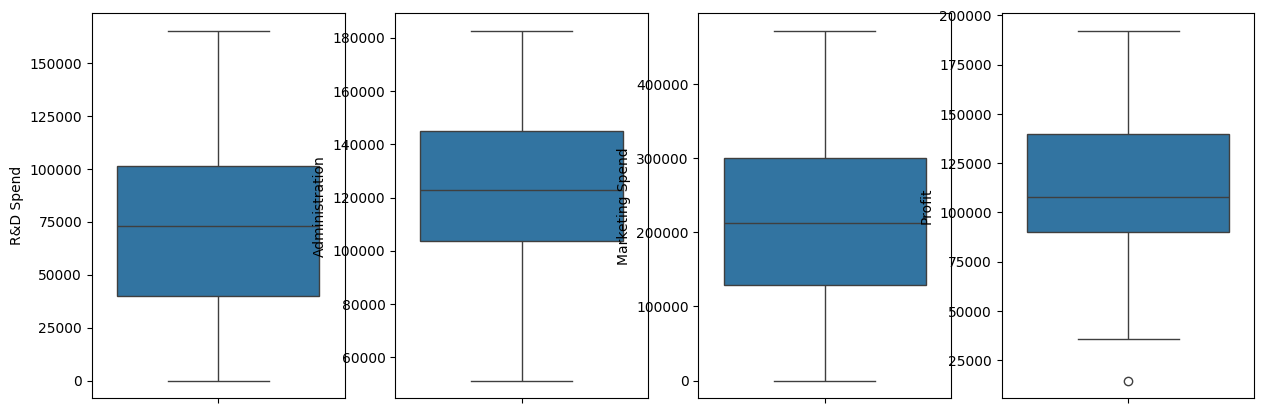

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(141)
sns.boxplot(data['R&D Spend'])
plt.subplot(142)
sns.boxplot(data['Administration'])
plt.subplot(143)
sns.boxplot(data['Marketing Spend'])
plt.subplot(144)
sns.boxplot(data['Profit'])
plt.show()

As we saw in the above code we did't found any outliears in independent features ,but we found one outliear in dependent feature that is not a problem.

4. Correlation Analysis

In [44]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


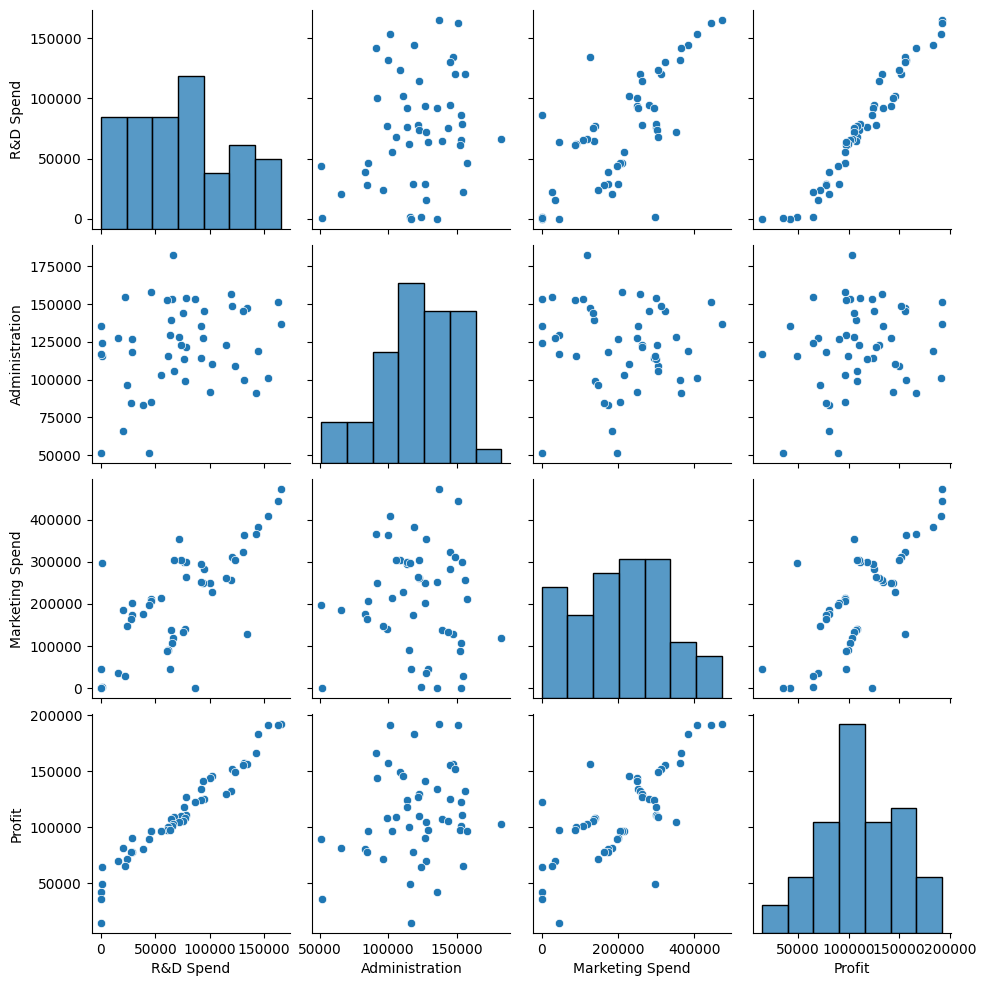

In [45]:
sns.pairplot(data=data)
plt.show()

### **Model Building**

In [55]:
data=data.rename({'R&D Spend':"RDS",'Administration':"ADS",'Marketing Spend':'MRK'},axis=1)

In [56]:
data.head()

,RDS,ADS,MRK,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [57]:
import statsmodels.formula.api as smf

In [58]:
model=smf.ols("Profit~RDS+ADS+MRK",data=data).fit()

In [59]:
model.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MRK              0.027228
dtype: float64

In [60]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

As we saw above code the Accuracy is **95%** it was good

In [62]:
#Lets Check any insignificant Features are there in the model
(model.pvalues,model.tvalues)
# as we saw there is no insignificant Features in the data

(Intercept    1.057379e-09
 RDS          2.634968e-22
 ADS          6.017551e-01
 MRK          1.047168e-01
 dtype: float64,
 Intercept     7.626218
 RDS          17.846374
 ADS          -0.525507
 MRK           1.655077
 dtype: float64)

In [63]:
#lets Check One by one,For that we need to build SLR models
slr_r=smf.ols("Profit~RDS",data=data).fit()

In [64]:
#Finding P values and Tvalues
(slr_r.pvalues,slr_r.tvalues)
#as we saw RDS is significant

(Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64,
 Intercept    19.320288
 RDS          29.151139
 dtype: float64)

In [65]:
slr_a=smf.ols("Profit~ADS",data=data).fit()

In [66]:
# Finding tvalues and pvalues.
(slr_a.pvalues,slr_a.tvalues)
# Here We can See pvalue of "ADS" become Significant.

(Intercept    0.003824
 ADS          0.162217
 dtype: float64,
 Intercept    3.040044
 ADS          1.419493
 dtype: float64)

In [67]:
slr_m=smf.ols("Profit~MRK",data=data).fit()

In [68]:
# Finding tvalues and pvalues.
(slr_m.pvalues,slr_m.tvalues)
# Here We can See pvalue of "MRK" become Significant.

(Intercept    4.294735e-10
 MRK          4.381073e-10
 dtype: float64,
 Intercept    7.808356
 MRK          7.802657
 dtype: float64)

In [69]:
slr_ma=smf.ols("Profit~MRK+ADS",data=data).fit()

In [71]:
# Finding tvalues and pvalues.
(slr_ma.pvalues,slr_ma.tvalues)
# Here We can See pvalue of "MRK" and 'ADS' become Significant.

(Intercept    2.589341e-01
 MRK          9.727245e-11
 ADS          1.729198e-02
 dtype: float64,
 Intercept    1.142741
 MRK          8.281039
 ADS          2.467779
 dtype: float64)

## **Model Validation**

In [73]:
# There Are 2 Types of Model validation Techniques.
# 1.Collinearity Check  2.Residual Analysis.

# 1.Collinearity Check.
# One method to detect multicollinearity is to calculate the variance inflation factor (VIF) for each independent variable.
# VIF = 1/(1-Rsquare).

rsq_rds=smf.ols('RDS~ADS+MRK',data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adms=smf.ols('ADS~RDS+MRK',data=data).fit().rsquared
vif_adms=1/(1-rsq_adms)

rsq_mkts=smf.ols('MRK~RDS+ADS',data=data).fit().rsquared
vif_mkts=1/(1-rsq_mkts)

In [74]:
# Putting  The  Values in a DataFrame .
df={'Variables':['RDS','ADS','MRK'],'VIF':[vif_rds,vif_adms,vif_mkts]}
vif_df=pd.DataFrame(df)
vif_df

# VIF = 1, no correlation between the independent variable and the other variables.
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.
# Here We can see That There is "No Multicollinearity" between The Indipendant Variables.Therefore None Of The Variables Are Predicted By the Other variables.


,Variables,VIF
0,RDS,2.468903
1,ADS,1.175091
2,MRK,2.326773


In [75]:
import statsmodels.api as sm

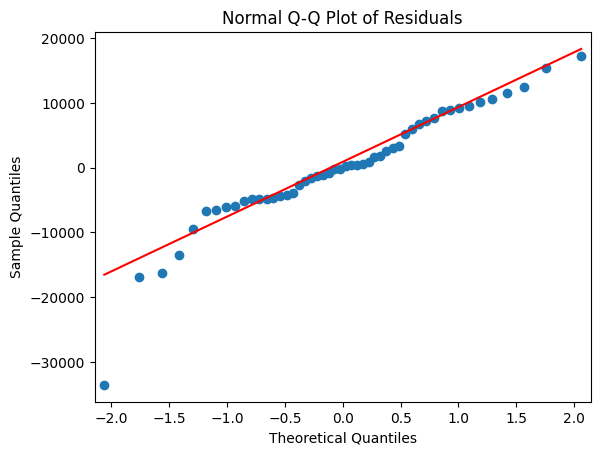

In [76]:
# 2. Residual Analysis.
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid).

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [77]:
# Outlier Detection from the above Q-Q plot of Residuals.
#From the Above Plot we can see that below -30000  values are outliers.

list(np.where(model.resid<-30000))

[array([49])]

In [78]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values).
#Homoscedasticity describes how the error term (the noise or disturbance between independent and dependent variables) is the same across the values of the independent variables.
#So, in homoscedasticity, the residual term is constant across observations, i.e., the variance is constant.
#In simple terms, as the value of the dependent variable changes, the error term does not vary much.

#In contrast, heteroscedasticity occurs when the size of the error term differs across the independent variable’s value.
# We can easily plots of Homoscedasticity and heteroscedasticity .In plot If we can its classic cone or fan shape it indicates heteroscedasticity.

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

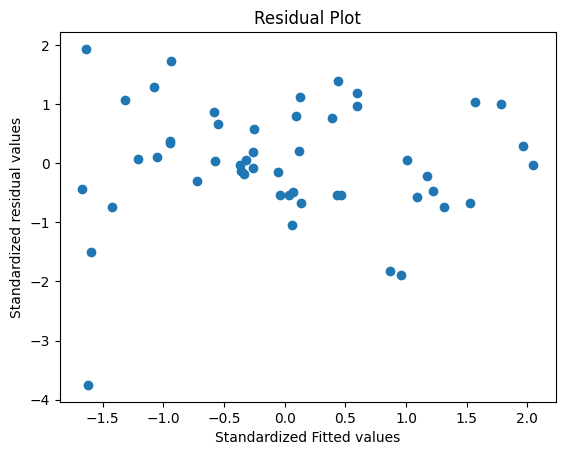

In [79]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [80]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

from statsmodels.graphics.regressionplots import influence_plot

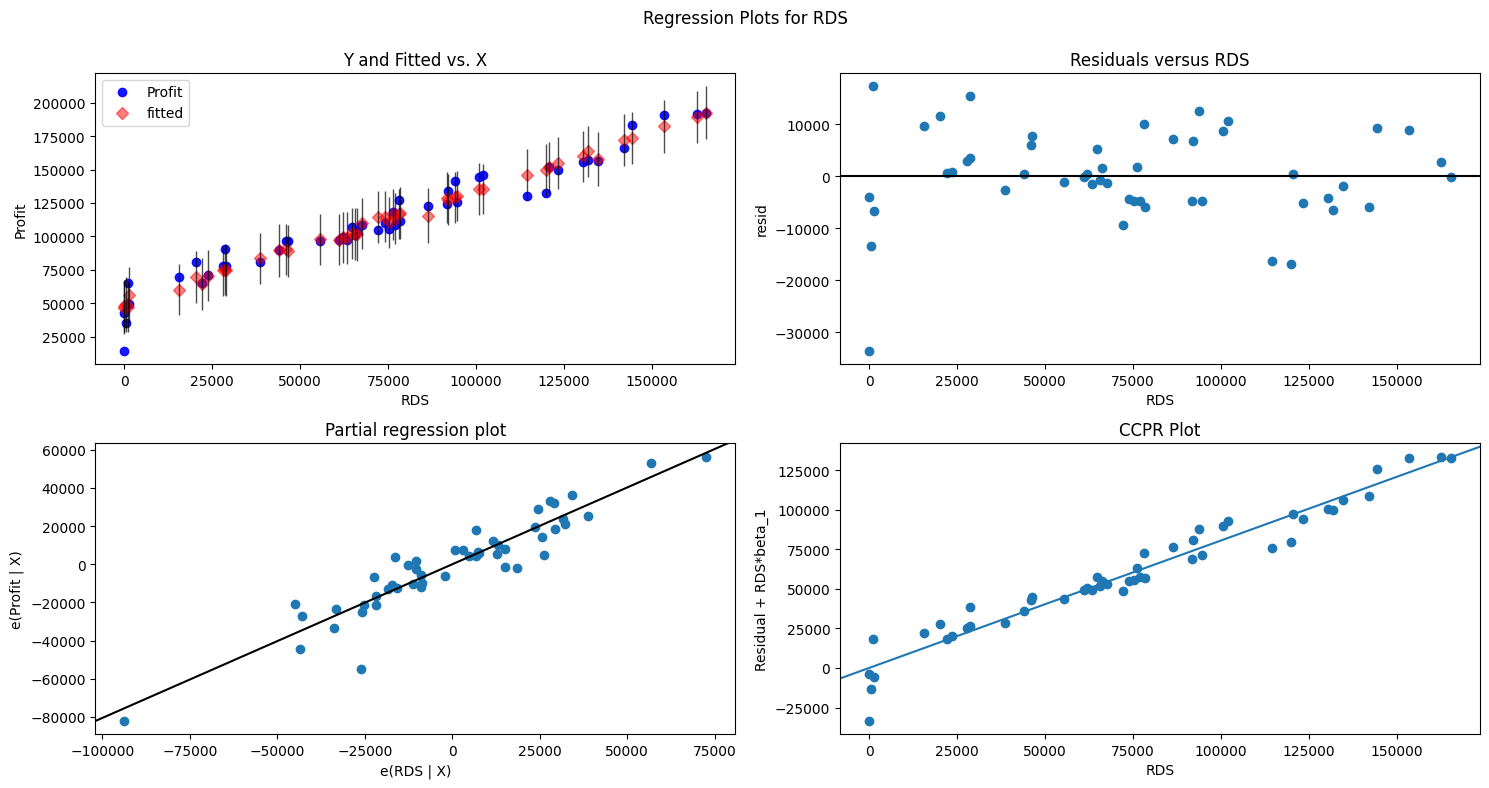

In [81]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

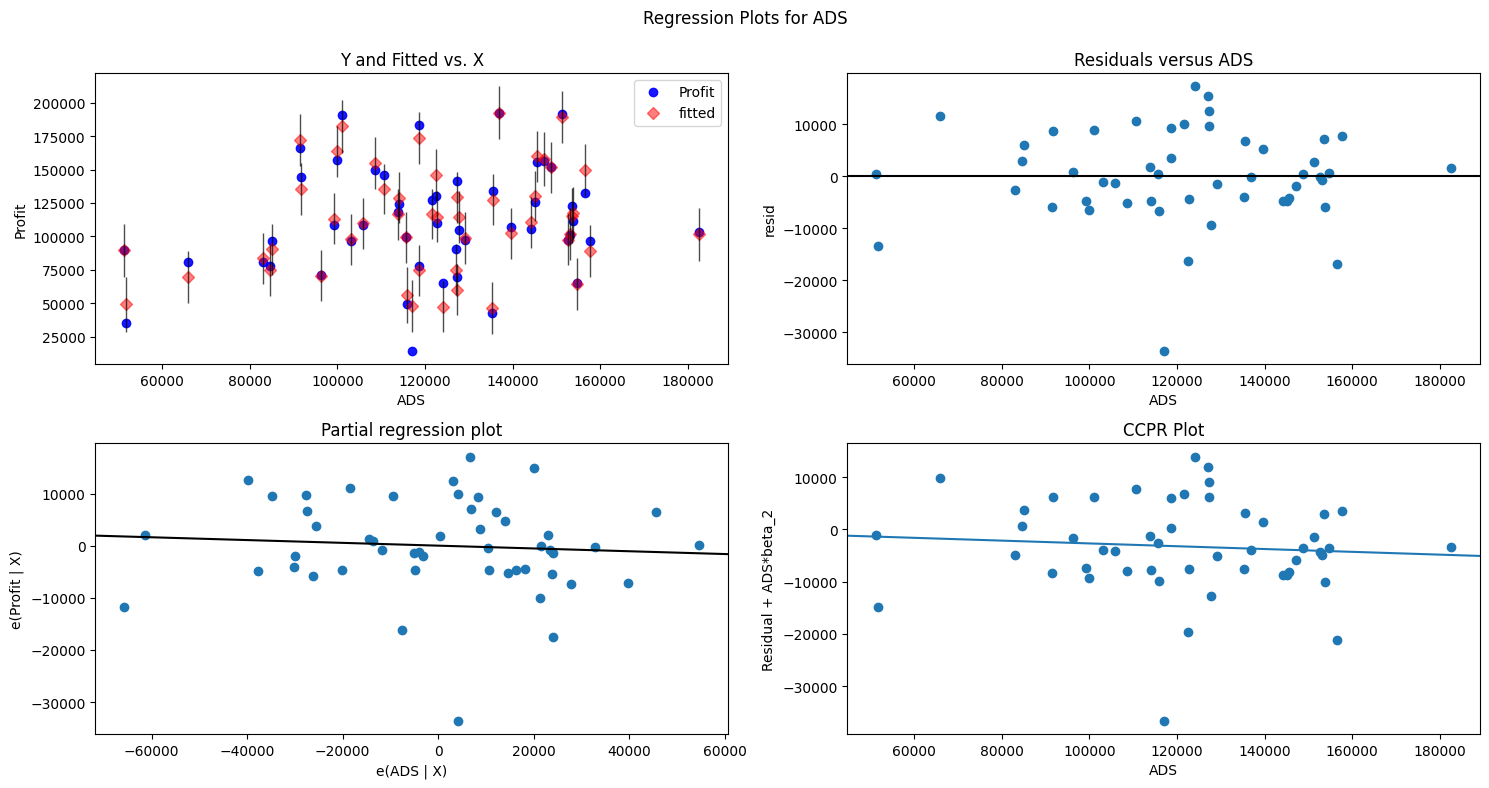

In [82]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADS',fig=fig)
plt.show()

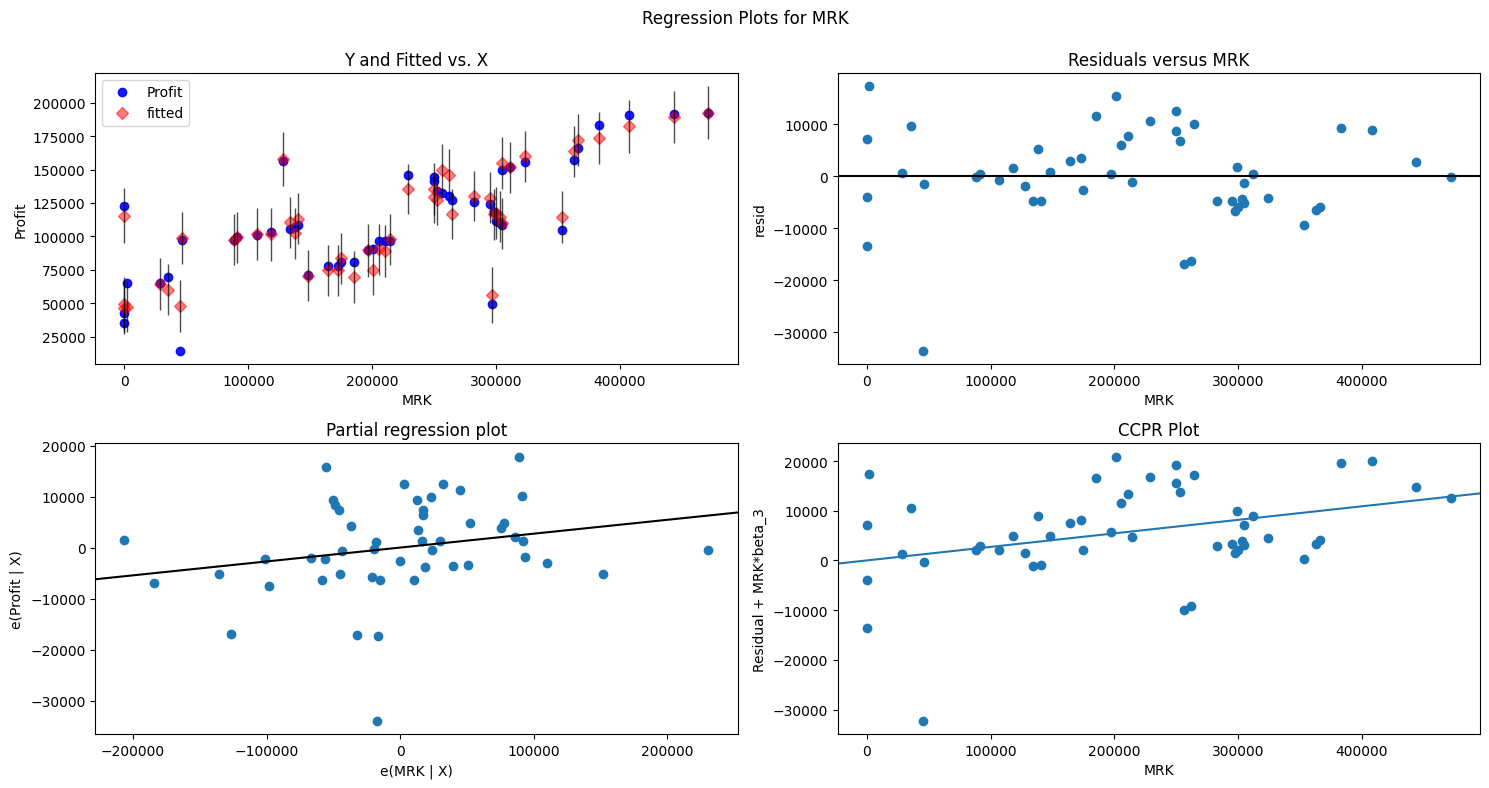

In [83]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MRK',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

Two Techniques : 1. Cook's Distance & 2. Leverage value

In [84]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier.
# Get influencers using cook's distance.
(c, _)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

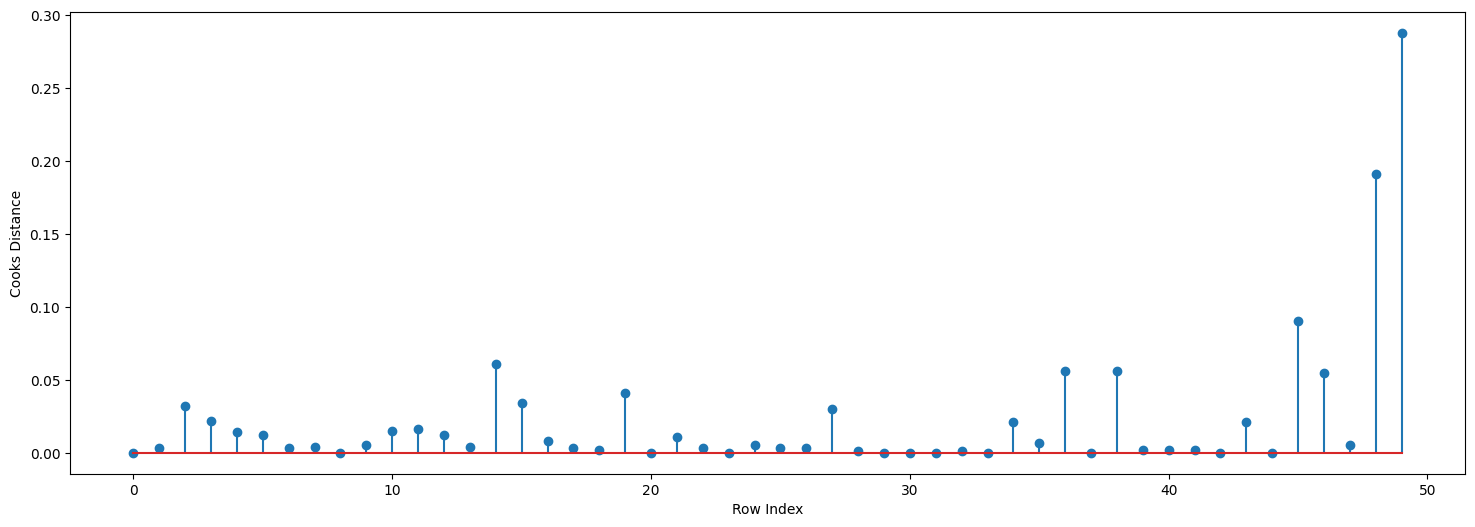

In [85]:
fig=plt.figure(figsize=(18,6))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [86]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

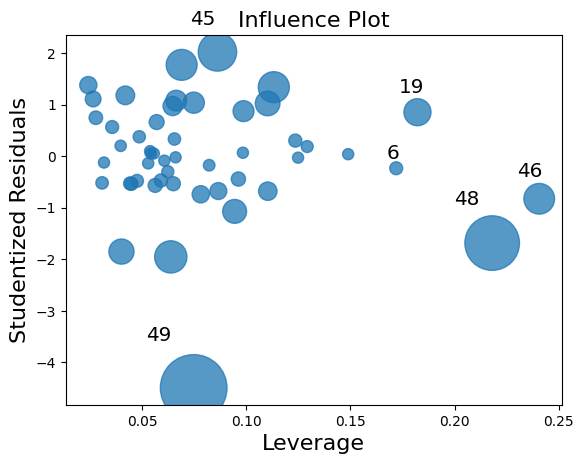

In [87]:
#fig,ax=plt.subplots(figsize=(20,20))
#fig=influence_plot(model,ax = ax)
influence_plot(model)
plt.show()

In [88]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers.
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

# From the above , it is evident that points beyond leverage cutoff value=0.36 are the outliers.

0.30000000000000004

In [89]:
# Getting the Outlier data point index Values.
data[data.index.isin([49])]

,RDS,ADS,MRK,Profit
49,0.0,116983.8,45173.06,14681.4


## Improving The Model.

In [90]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True)).
data_1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data_1

,RDS,ADS,MRK,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [91]:
data_1.shape

(49, 4)

### Model Deletion Diagnostics and Final Model

In [92]:
while np.max(c)>0.5 :
    model=smf.ols('Profit~RDS+ADS+MRK',data=data_1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data_1=data_1.drop(data_1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data_1
else:
    final_model=smf.ols('Profit~RDS+ADS+MRK',data=data_1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [93]:
final_model.rsquared

0.9613162435129847

### **Model Predictions.**

In [94]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADS":90000,"MRK":140000},index=[0])
new_data

,RDS,ADS,MRK
0,70000,90000,140000


In [95]:
# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [96]:
# Automatic Prediction of Price with 90.02% accurcy.
pred_y=final_model.predict(data_1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [97]:
# making a table containing R^2 value for each prepared model
df2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(df2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
